GASER ZAGHLOUL

libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


read data

In [2]:
df=pd.read_csv("/Users/gaserzaghlol/Desktop/celulla internship/1 feb/first inten project.csv")

In [3]:
df

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36280,INN36282,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,Online,0,0,0,115.00,1,9/13/2018,Canceled
36281,INN36283,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,Online,0,0,0,107.55,1,10/15/2017,Not_Canceled
36282,INN36284,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,Online,0,0,0,105.61,1,12/26/2018,Not_Canceled
36283,INN36285,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,Offline,0,0,0,96.90,1,7/6/2018,Not_Canceled


check data types 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

check any missing values 

In [5]:
df.isnull().sum()

Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64

check any dupicates

In [6]:
df.duplicated().sum()

0

name numerical and categorical columns 

In [7]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
numerical_columns

Index(['number of adults', 'number of children', 'number of weekend nights',
       'number of week nights', 'car parking space', 'lead time', 'repeated',
       'P-C', 'P-not-C', 'average price ', 'special requests'],
      dtype='object')

In [8]:
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['Booking_ID', 'type of meal', 'room type', 'market segment type',
       'date of reservation', 'booking status'],
      dtype='object')

show the most number of child and adult repeated in the data 

In [9]:
print(df["number of adults"].value_counts())
print(df["number of children"].value_counts())


number of adults
2    26110
1     7702
3     2318
0      139
4       16
Name: count, dtype: int64
number of children
0     33583
1      1622
2      1058
3        19
9         2
10        1
Name: count, dtype: int64


same thing in the nights 

In [10]:
print(df["number of weekend nights"].value_counts())
print(df["number of week nights"].value_counts())

number of weekend nights
0    16876
1    10000
2     9072
3      153
4      129
5       34
6       20
7        1
Name: count, dtype: int64
number of week nights
2     11447
1      9488
3      7842
4      2992
0      2387
5      1616
6       189
7       113
10       62
8        62
9        34
11       17
15       10
12        9
14        7
13        5
17        3
16        2
Name: count, dtype: int64


we have outliers in the week and weekend columns , week rane(0-7), weekend (0-2)

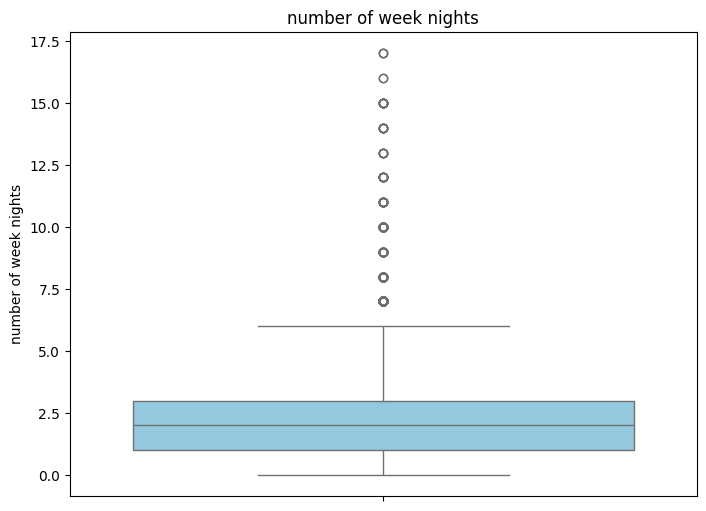

In [11]:
plt.figure(figsize=(20, 10))
plt.subplot(2, 3,1)
sns.boxplot(y=df["number of week nights"], color='skyblue')
plt.title(f'number of week nights')
plt.tight_layout()
plt.show()

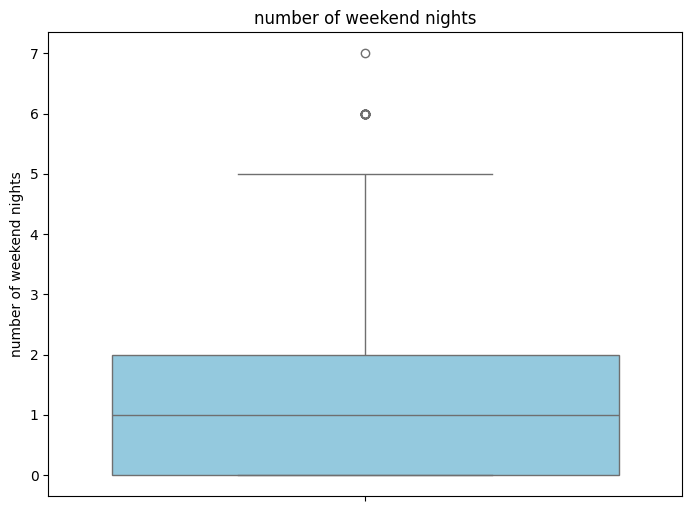

In [12]:
plt.figure(figsize=(20, 10))
plt.subplot(2, 3,1)
sns.boxplot(y=df["number of weekend nights"], color='skyblue')
plt.title(f'number of weekend nights')
plt.tight_layout()
plt.show()

In [13]:
df["number of week nights"].replace(range(6,18),5, inplace=True)
df["number of weekend nights"].replace(range(3,8),2, inplace=True)


In [14]:
print(df["number of week nights"].value_counts())
print(df["number of weekend nights"].value_counts())

number of week nights
2    11447
1     9488
3     7842
4     2992
0     2387
5     2129
Name: count, dtype: int64
number of weekend nights
0    16876
1    10000
2     9409
Name: count, dtype: int64


In [15]:
df["number of week nights"].replace(0,1, inplace=True)

In [16]:
print(df["number of week nights"].value_counts())
print(df["number of weekend nights"].value_counts())

number of week nights
1    11875
2    11447
3     7842
4     2992
5     2129
Name: count, dtype: int64
number of weekend nights
0    16876
1    10000
2     9409
Name: count, dtype: int64


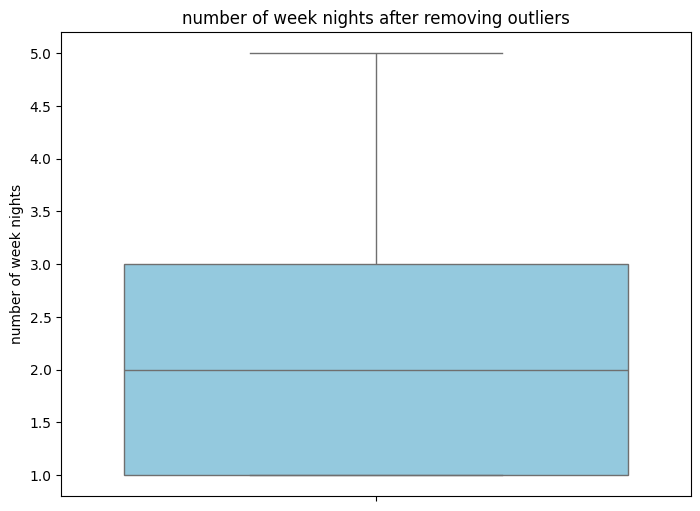

In [17]:
plt.figure(figsize=(20, 10))
plt.subplot(2, 3,1)
sns.boxplot(y=df["number of week nights"], color='skyblue')
plt.title(f'number of week nights after removing outliers')
plt.tight_layout()
plt.show()

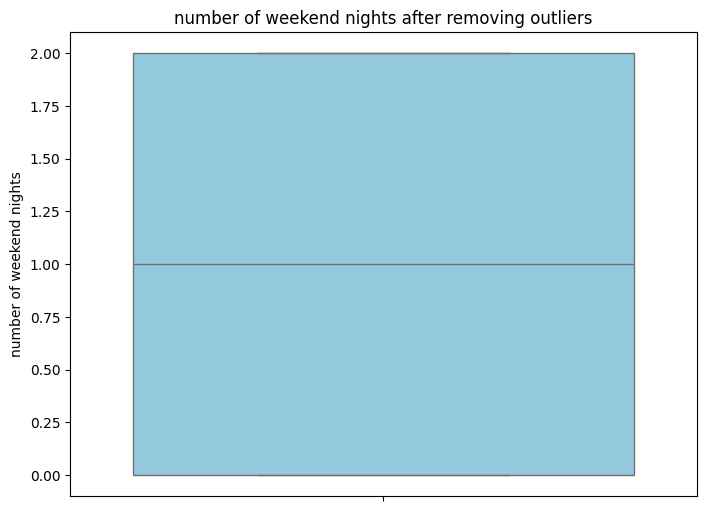

In [18]:
plt.figure(figsize=(20, 10))
plt.subplot(2, 3,1)
sns.boxplot(y=df["number of weekend nights"], color='skyblue')
plt.title(f'number of weekend nights after removing outliers')
plt.tight_layout()
plt.show()

show the max and min number of adult we have

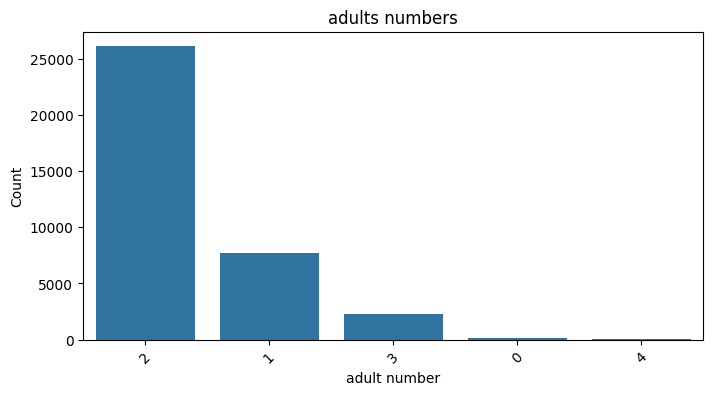

In [19]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x="number of adults", order=df["number of adults"].value_counts().index)
plt.title("adults numbers")
plt.xlabel("adult number")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [20]:
df["number of adults"].mean()

1.844839465343806

show the max and min number of adult we have

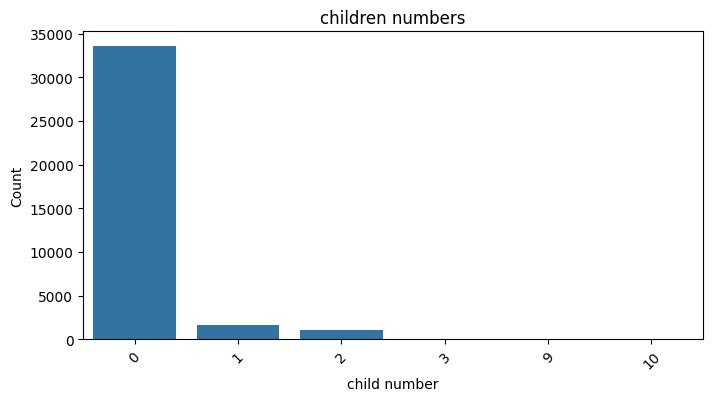

In [21]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x="number of children", order=df["number of children"].value_counts().index)
plt.title("children numbers")
plt.xlabel("child number")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

which books that have the max number of children ?
which books that have the max number of adult  ?



 summary statistics of numerical columns 
 

In [22]:
df.describe()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests
count,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000
mean,1.844839,0.105360,0.794212,2.229792,0.030977,85.239851,0.025630,0.023343,0.153369,103.421636,0.619733
std,0.518813,0.402704,0.825878,1.161261,0.173258,85.938796,0.158032,0.368281,1.753931,35.086469,0.786262
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,2.000000,5.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000


 the distribution of numerical columns 

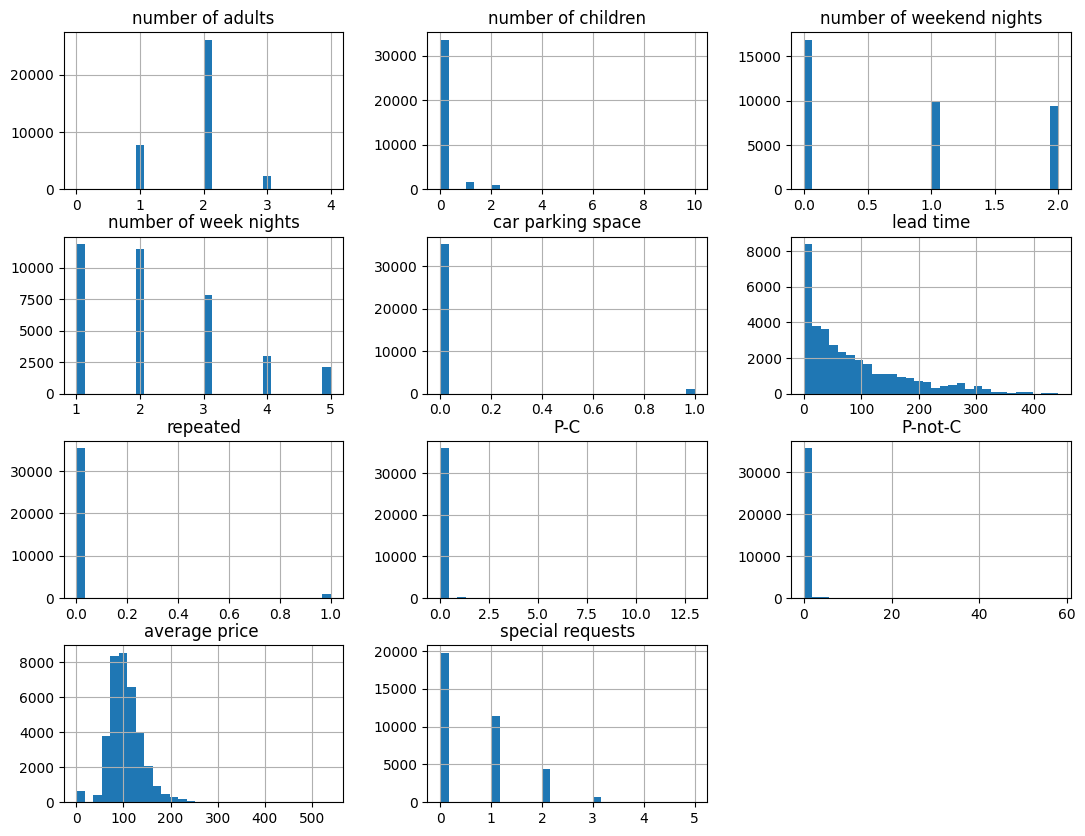

In [23]:
df.hist(figsize=(13, 10), bins=30)
plt.show()

 the correlations between numerical columns 

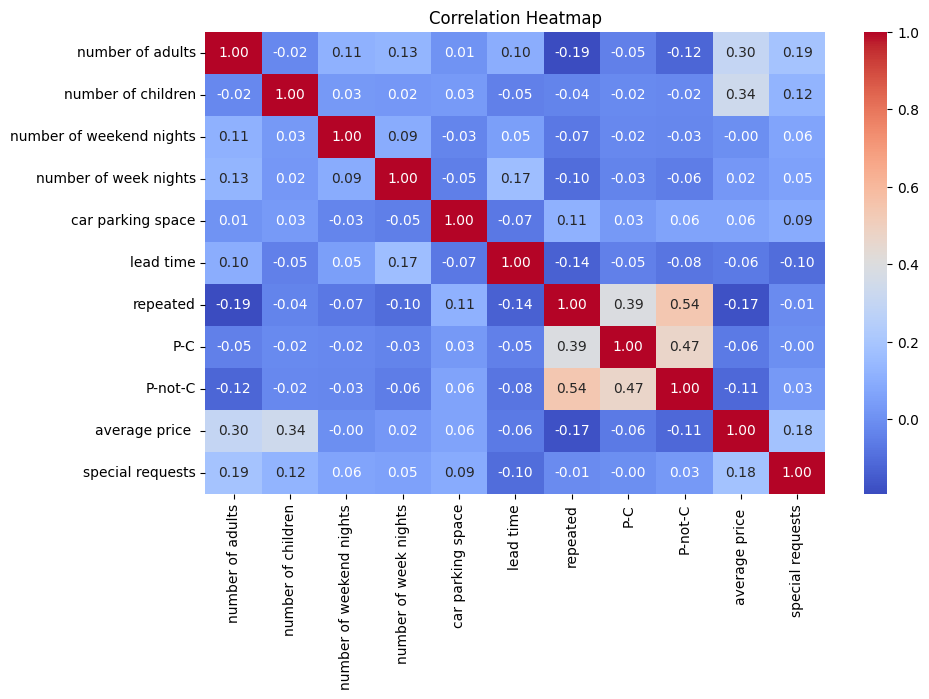

In [24]:
numerical = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(10, 6))
sns.heatmap(numerical.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


What are the most common categories ???

In [25]:
for col in df.select_dtypes(include="object").columns:
    print(f"Column: {col}")
    print(df[col].value_counts(), "\n")


Column: Booking_ID
Booking_ID
INN00001    1
INN24194    1
INN24188    1
INN24189    1
INN24190    1
           ..
INN12090    1
INN12089    1
INN12088    1
INN12087    1
INN36286    1
Name: count, Length: 36285, dtype: int64 

Column: type of meal
type of meal
Meal Plan 1     27842
Not Selected     5132
Meal Plan 2      3306
Meal Plan 3         5
Name: count, dtype: int64 

Column: room type
room type
Room_Type 1    28138
Room_Type 4     6059
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64 

Column: market segment type
market segment type
Online           23221
Offline          10531
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64 

Column: date of reservation
date of reservation
10/13/2018    254
10/16/2017    236
6/15/2018     231
6/24/2018     213
9/18/2017     201
             ... 
10/2/2015       1
7/24/2017       1
9/13/2016       1
5/20/2017       1
7

which days of the week have the highest reservations

/var/folders/n3/wjkp0vc91m9ghmr9d1jmxkpm0000gn/T/ipykernel_89280/298696612.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_counts.index, y=day_counts.values, palette="Blues_r")


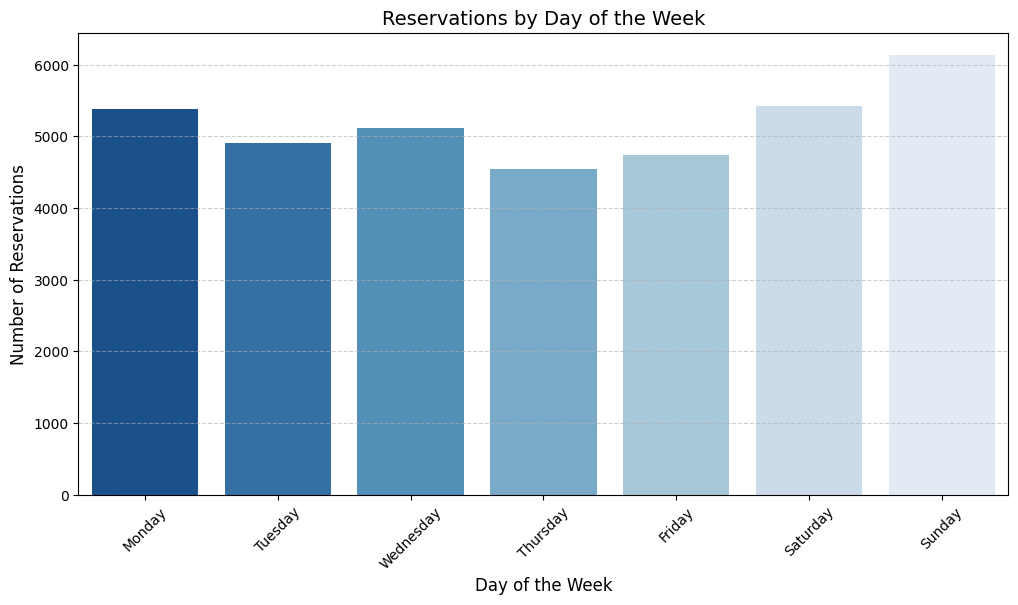

In [26]:
df['date of reservation'] = pd.to_datetime(df['date of reservation'], errors='coerce')
df['day_of_week'] = df['date of reservation'].dt.day_name()
# Coount reservations per day
day_counts = df['day_of_week'].value_counts()
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
day_counts = day_counts.reindex(day_order)


plt.figure(figsize=(12, 6))
sns.barplot(x=day_counts.index, y=day_counts.values, palette="Blues_r")
plt.title("Reservations by Day of the Week", fontsize=14)
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Number of Reservations", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()


which month have the highest reservations

/var/folders/n3/wjkp0vc91m9ghmr9d1jmxkpm0000gn/T/ipykernel_89280/1604048050.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=month_counts.index, y=month_counts.values, palette="Greens_r")


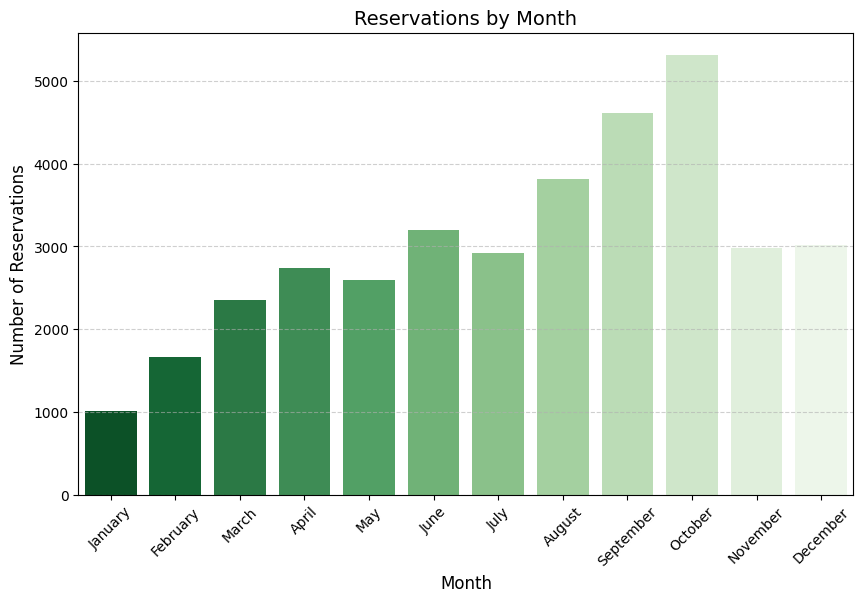

In [27]:
df['month'] = df['date of reservation'].dt.month_name()
month_counts = df['month'].value_counts()
month_order = ["January", "February", "March", "April", "May", "June", 
            "July", "August", "September", "October", "November", "December"]
month_counts = month_counts.reindex(month_order)

plt.figure(figsize=(10, 6))
sns.barplot(x=month_counts.index, y=month_counts.values, palette="Greens_r")

plt.title("Reservations by Month", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Reservations", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

In [28]:
total_reservations = df.shape[0]
print(f"Total Reservations: {total_reservations}")


Total Reservations: 36285


the average price across room types



/var/folders/n3/wjkp0vc91m9ghmr9d1jmxkpm0000gn/T/ipykernel_89280/4243647583.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=room_price.index, y=room_price.values, palette="Blues_r")


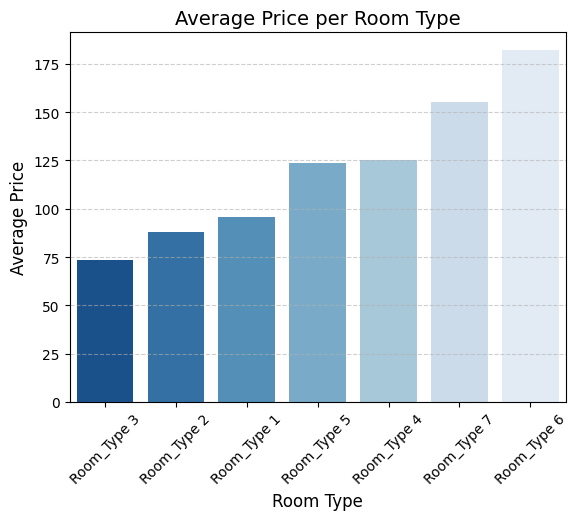

In [29]:
room_price = df.groupby("room type")["average price "].mean().sort_values()

sns.barplot(x=room_price.index, y=room_price.values, palette="Blues_r")

plt.title("Average Price per Room Type", fontsize=14)
plt.xlabel("Room Type", fontsize=12)
plt.ylabel("Average Price", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()


the average price across meal types



/var/folders/n3/wjkp0vc91m9ghmr9d1jmxkpm0000gn/T/ipykernel_89280/2043072182.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=meal_price.index, y=meal_price.values, palette="Blues_r")


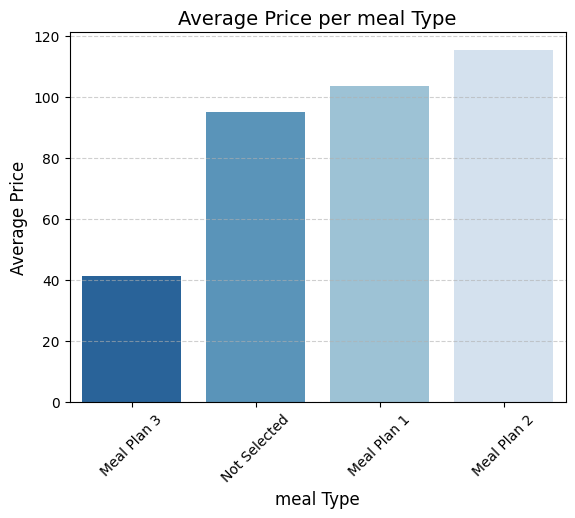

In [30]:
meal_price = df.groupby("type of meal")["average price "].mean().sort_values()

sns.barplot(x=meal_price.index, y=meal_price.values, palette="Blues_r")

plt.title("Average Price per meal Type", fontsize=14)
plt.xlabel("meal Type", fontsize=12)
plt.ylabel("Average Price", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

how many books are canceled and its percentage

/var/folders/n3/wjkp0vc91m9ghmr9d1jmxkpm0000gn/T/ipykernel_89280/375544733.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["booking status"], palette="coolwarm")


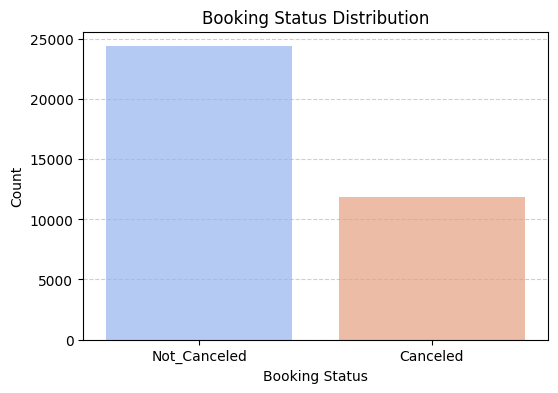

In [31]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df["booking status"], palette="coolwarm")
plt.title("Booking Status Distribution")
plt.xlabel("Booking Status")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


In [32]:
cancellation_rate = (df['booking status'].value_counts(normalize=True) * 100)
print(cancellation_rate)

booking status
Not_Canceled    67.234394
Canceled        32.765606
Name: proportion, dtype: float64


 Which month had the highest cancellations?

/var/folders/n3/wjkp0vc91m9ghmr9d1jmxkpm0000gn/T/ipykernel_89280/1175606262.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cancellation_counts.index, y=cancellation_counts.values, palette="Reds_r")


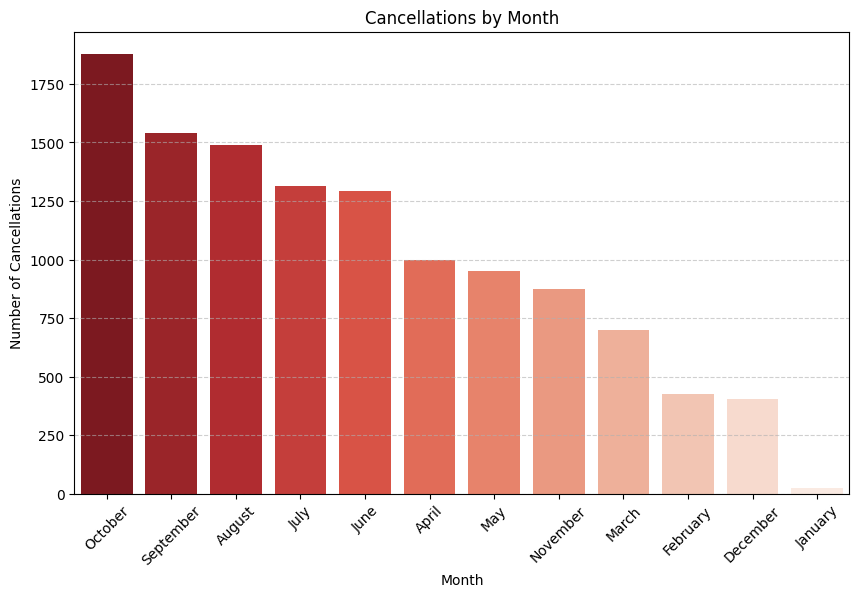

In [33]:
df['month'] = df['date of reservation'].dt.month_name()
cancellation_counts = df[df['booking status'] == 'Canceled']['month'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=cancellation_counts.index, y=cancellation_counts.values, palette="Reds_r")
plt.title("Cancellations by Month")
plt.xlabel("Month")
plt.ylabel("Number of Cancellations")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


Do last-minute bookings have a higher cancellation rate?

lead time is the time between reservation and the checj-in 

/var/folders/n3/wjkp0vc91m9ghmr9d1jmxkpm0000gn/T/ipykernel_89280/2384711344.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cancellation_rate_by_lead = df[df['booking status'] == 'Canceled'].groupby('lead_time_category').size()
/var/folders/n3/wjkp0vc91m9ghmr9d1jmxkpm0000gn/T/ipykernel_89280/2384711344.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cancellation_rate_by_lead.index, y=cancellation_rate_by_lead.values, palette="Reds_r")


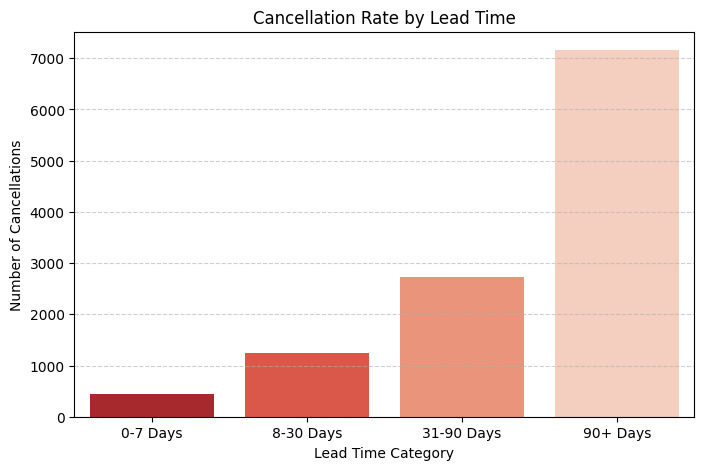

In [34]:
df['lead_time_category'] = pd.cut(df['lead time'], bins=[0, 7, 30, 90, 365], 
                                labels=['0-7 Days', '8-30 Days', '31-90 Days', '90+ Days'])
cancellation_rate_by_lead = df[df['booking status'] == 'Canceled'].groupby('lead_time_category').size()


plt.figure(figsize=(8, 5))
sns.barplot(x=cancellation_rate_by_lead.index, y=cancellation_rate_by_lead.values, palette="Reds_r")
plt.title("Cancellation Rate by Lead Time")
plt.xlabel("Lead Time Category")
plt.ylabel("Number of Cancellations")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


/var/folders/n3/wjkp0vc91m9ghmr9d1jmxkpm0000gn/T/ipykernel_89280/2214883118.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=room_counts.index, y=room_counts.values, palette="Greens_r")


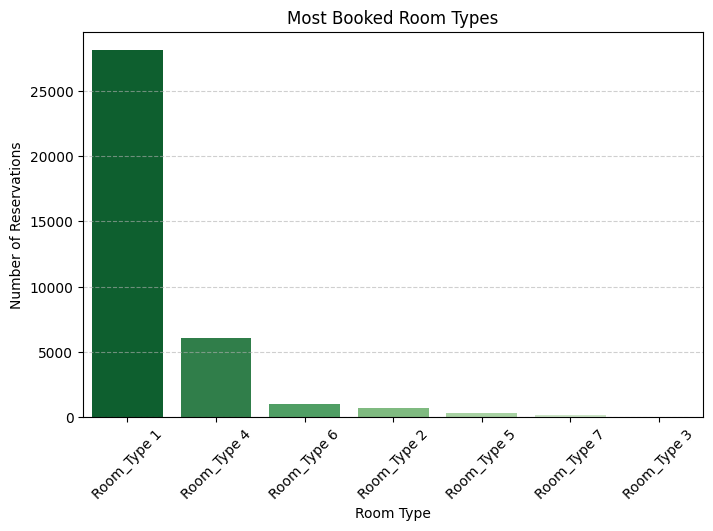

In [35]:
room_counts = df['room type'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=room_counts.index, y=room_counts.values, palette="Greens_r")
plt.title("Most Booked Room Types")
plt.xlabel("Room Type")
plt.ylabel("Number of Reservations")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


most market segment 

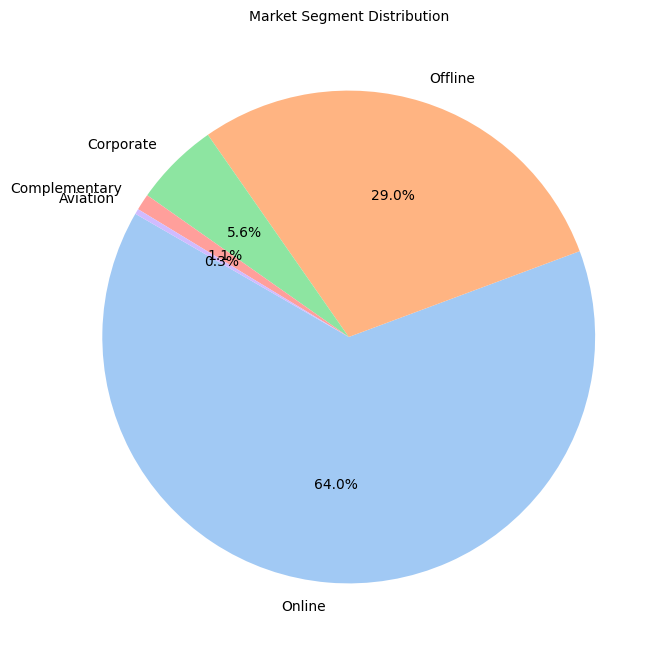

In [36]:
market_counts = df['market segment type'].value_counts()
plt.figure(figsize=(10, 8))
colors = sns.color_palette("pastel")
plt.pie(market_counts, labels=market_counts.index, autopct='%2.1f%%', colors=colors, startangle=150)

plt.title("Market Segment Distribution", fontsize=10)
plt.show()


price accourding to the market type

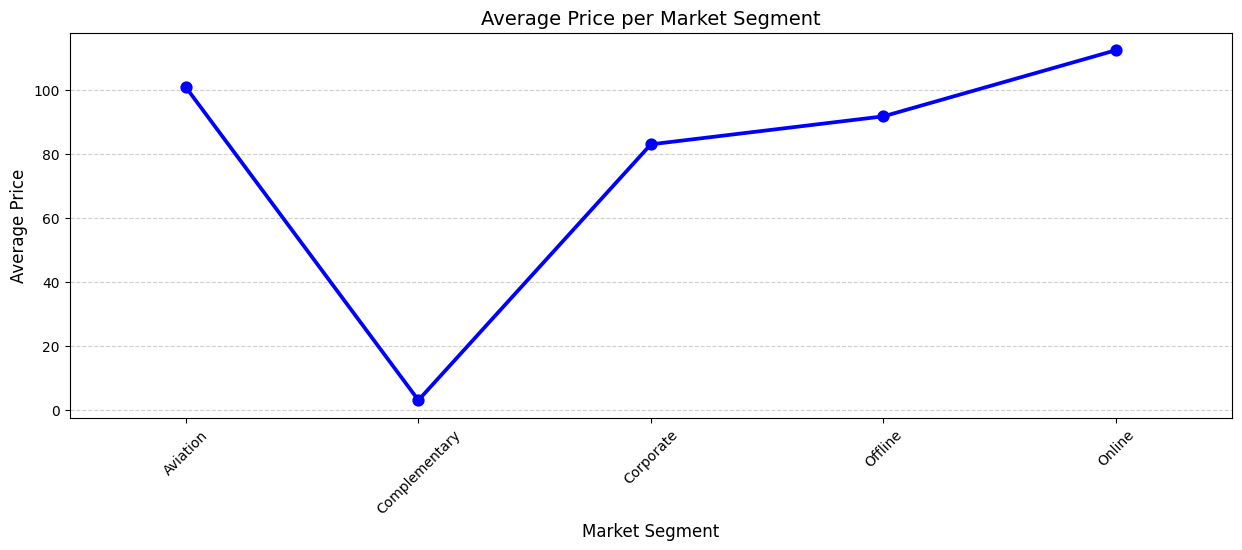

In [37]:
market_avg_price = df.groupby('market segment type')["average price "].mean().reset_index()

plt.figure(figsize=(15, 5))
sns.pointplot(data=market_avg_price, x="market segment type", y="average price ", color="blue", marker="o", linestyles="-")
plt.title("Average Price per Market Segment", fontsize=14)
plt.xlabel("Market Segment", fontsize=12)
plt.ylabel("Average Price", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()


Do guests with children book more weekends compared to weekdays?

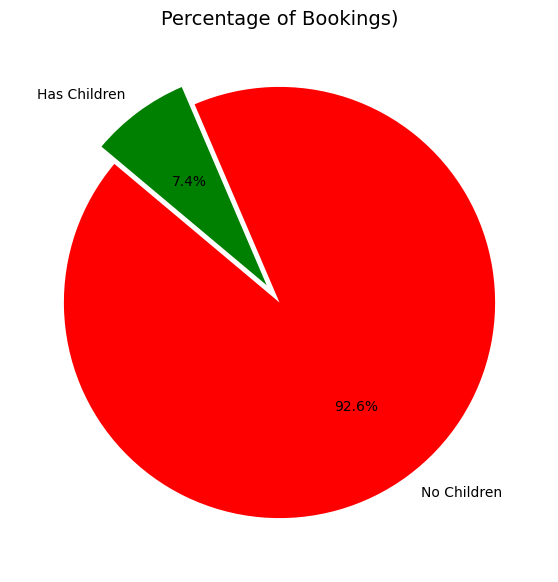

In [38]:
df['has_children'] = df['number of children'] > 0
children_counts = df['has_children'].value_counts()
labels = ["No Children", "Has Children"]


plt.figure(figsize=(7, 7))
colors = ["red", "green"] 
plt.pie(children_counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140, explode=[0, 0.1])

plt.title("Percentage of Bookings)", fontsize=14)
plt.show()



Do special requests impact cancellations?

/var/folders/n3/wjkp0vc91m9ghmr9d1jmxkpm0000gn/T/ipykernel_89280/1383319542.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["booking status"], y=df["special requests"], palette="coolwarm")


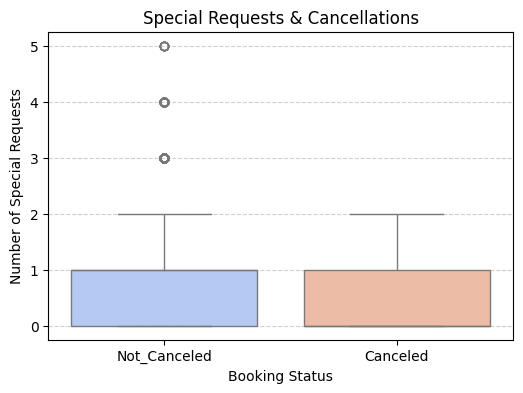

In [39]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df["booking status"], y=df["special requests"], palette="coolwarm")
plt.title("Special Requests & Cancellations")
plt.xlabel("Booking Status")
plt.ylabel("Number of Special Requests")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()



In [40]:
df['special requests'].value_counts()

special requests
0    19780
1    11379
2     4364
3      676
4       78
5        8
Name: count, dtype: int64

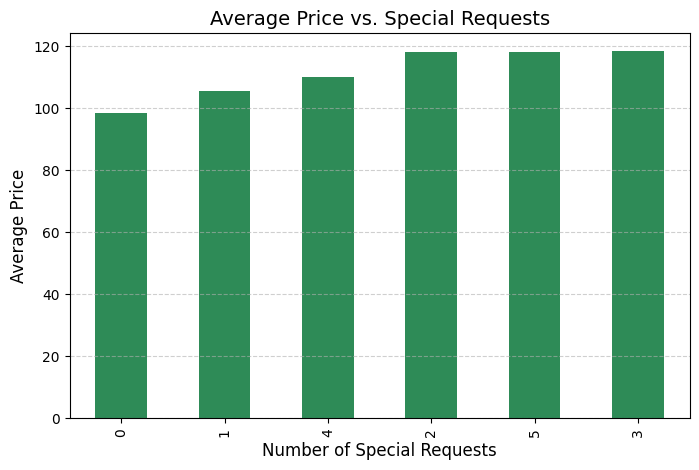

In [41]:
special_request_price = df.groupby("special requests")["average price "].mean()

plt.figure(figsize=(8, 5))
special_request_price.sort_values().plot(kind="bar", color="seagreen")

plt.title("Average Price vs. Special Requests", fontsize=14)
plt.xlabel("Number of Special Requests", fontsize=12)
plt.ylabel("Average Price", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()


Which room type has the highest number of special requests?

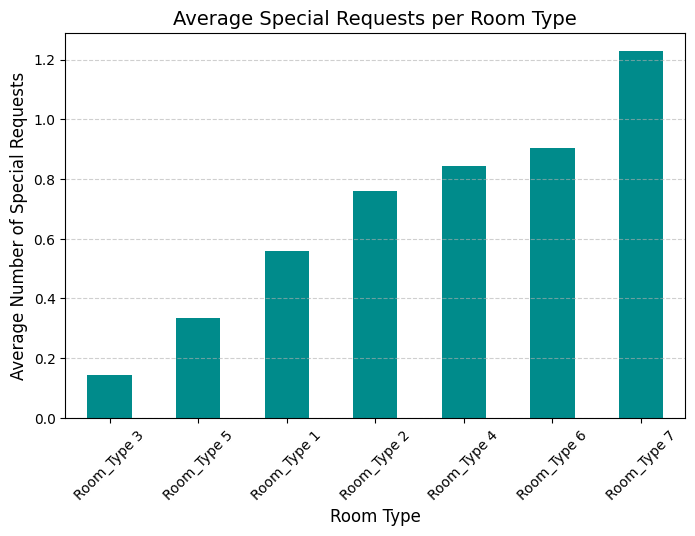

In [42]:
room_special_requests = df.groupby("room type")["special requests"].mean()

plt.figure(figsize=(8, 5))
room_special_requests.sort_values().plot(kind="bar", color="darkcyan")

plt.title("Average Special Requests per Room Type", fontsize=14)
plt.xlabel("Room Type", fontsize=12)
plt.ylabel("Average Number of Special Requests", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()


does family or not affect on booking price ?

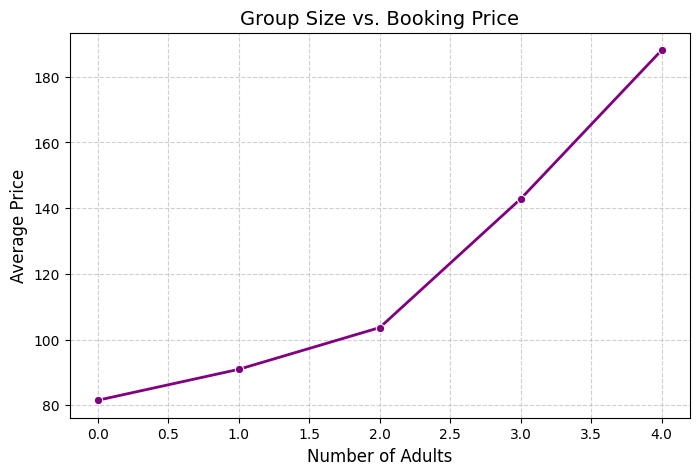

In [43]:
group_price = df.groupby("number of adults")["average price "].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.lineplot(data=group_price, x="number of adults", y="average price ", marker="o", color="purple", linewidth=2)
plt.title("Group Size vs. Booking Price", fontsize=14)
plt.xlabel("Number of Adults", fontsize=12)
plt.ylabel("Average Price", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()



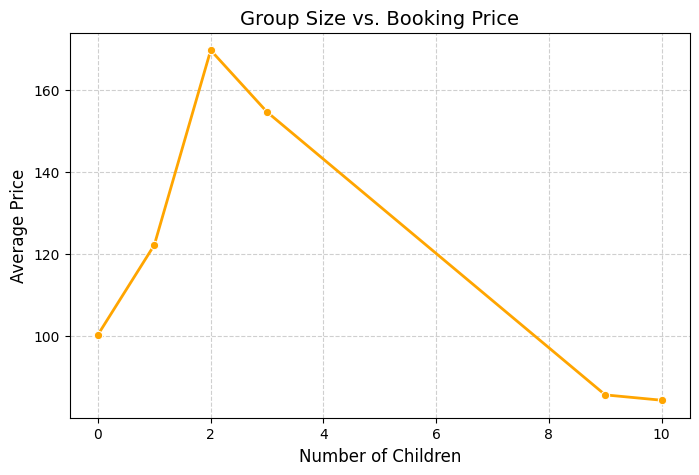

In [44]:
group_price = df.groupby("number of children")["average price "].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.lineplot(data=group_price, x="number of children", y="average price ", marker="o", color="orange", linewidth=2)
plt.title("Group Size vs. Booking Price", fontsize=14)
plt.xlabel("Number of Children", fontsize=12)
plt.ylabel("Average Price", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

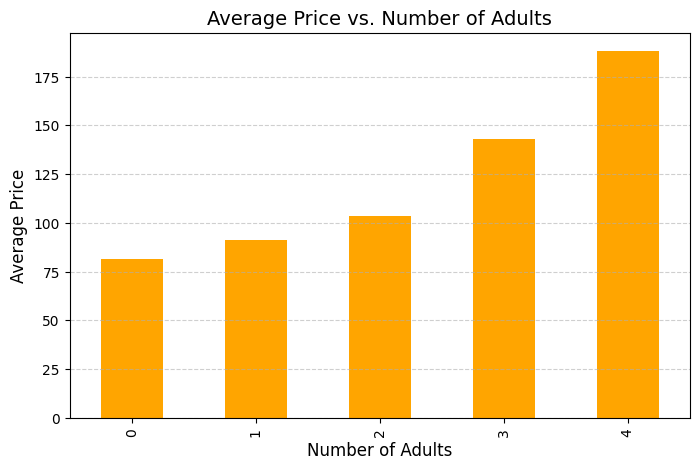

In [45]:
adults_price = df.groupby("number of adults")["average price "].mean()

plt.figure(figsize=(8, 5))
adults_price.sort_index().plot(kind="bar", color="orange")

plt.title("Average Price vs. Number of Adults", fontsize=14)
plt.xlabel("Number of Adults", fontsize=12)
plt.ylabel("Average Price", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()


 Does Car Parking Availability Affect Cancellation Probability?

/var/folders/n3/wjkp0vc91m9ghmr9d1jmxkpm0000gn/T/ipykernel_89280/353118854.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=parking_cancellation.index, y=parking_cancellation.values, palette="BuPu")


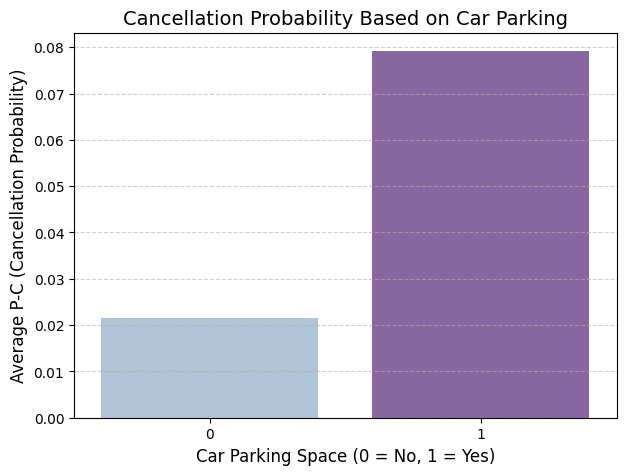

In [46]:
parking_cancellation = df.groupby("car parking space")["P-C"].mean()

plt.figure(figsize=(7, 5))
sns.barplot(x=parking_cancellation.index, y=parking_cancellation.values, palette="BuPu")

plt.title("Cancellation Probability Based on Car Parking", fontsize=14)
plt.xlabel("Car Parking Space (0 = No, 1 = Yes)", fontsize=12)
plt.ylabel("Average P-C (Cancellation Probability)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

 Do expensive Bookings have higher cancellations?

/var/folders/n3/wjkp0vc91m9ghmr9d1jmxkpm0000gn/T/ipykernel_89280/2844208104.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_cancellation = df.groupby("price_category")["P-C"].mean().reset_index()


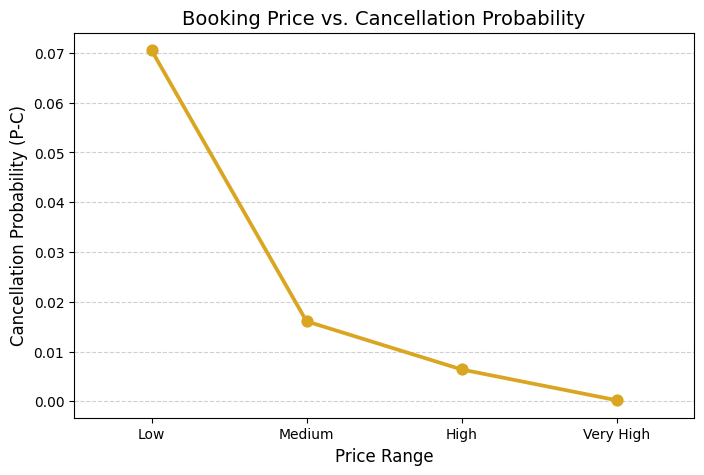

In [47]:
df["price_category"] = pd.qcut(df["average price "], 4, labels=["Low", "Medium", "High", "Very High"])
price_cancellation = df.groupby("price_category")["P-C"].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.pointplot(data=price_cancellation, x="price_category", y="P-C", color="goldenrod", marker="o", linestyles="-")
plt.title("Booking Price vs. Cancellation Probability", fontsize=14)
plt.xlabel("Price Range", fontsize=12)
plt.ylabel("Cancellation Probability (P-C)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()


Does having Children impact cancellation probability?

/var/folders/n3/wjkp0vc91m9ghmr9d1jmxkpm0000gn/T/ipykernel_89280/3023588210.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=children_cancellation.index, y=children_cancellation.values, palette="coolwarm")


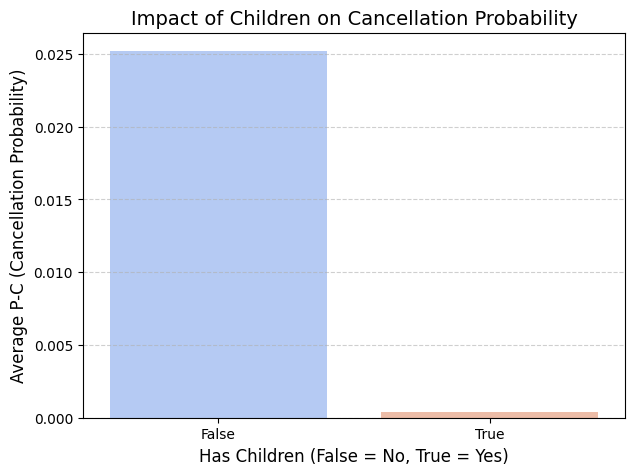

In [48]:
children_cancellation = df.groupby(df["number of children"] > 0)["P-C"].mean()

plt.figure(figsize=(7, 5))
sns.barplot(x=children_cancellation.index, y=children_cancellation.values, palette="coolwarm")

plt.title("Impact of Children on Cancellation Probability", fontsize=14)
plt.xlabel("Has Children (False = No, True = Yes)", fontsize=12)
plt.ylabel("Average P-C (Cancellation Probability)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()


 Do cancellations depend on the Number of Weekend Nights?

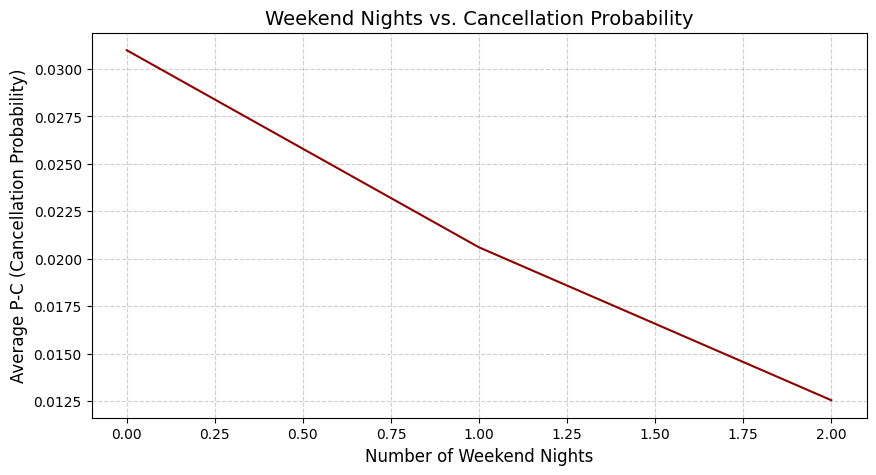

In [49]:
weekend_cancellation = df.groupby("number of weekend nights")["P-C"].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(x=weekend_cancellation.index, y=weekend_cancellation.values, color="darkred")
plt.title("Weekend Nights vs. Cancellation Probability", fontsize=14)
plt.xlabel("Number of Weekend Nights", fontsize=12)
plt.ylabel("Average P-C (Cancellation Probability)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()
